In [1]:
from bs4 import BeautifulSoup
import re
import os
import csv

In [2]:
#-4 to +4
def getRating1(soup):
    for p in soup.find_all('p'):
        m = re.search('(-?\d{1}) [\D]+-4 to \+4', p.getText())
        if(m is not None):
            print(m.group(0))
            print("rating: " +  m.group(1))
            return m.group(1).strip()
    return None

#grade A-D rating
def getRating2(soup):
    for p in soup.find_all('pre'):
        m = re.search('[g,G][r,R][a,A][d,D][e,E]:?.*?\\s+([a-d|A-D][+|-]?)', p.getText())
        if(m is not None):
            #print(m.group(0))
            #print("grade: " +  m.group(1))
            return m.group(1).strip()
    return None
      
# start rating(need to be modified)
def getRating3(soup):
    for p in soup.find_all('p'):
        m = re.search('(((\*)+(1/2)?) out of ((\*){4}))', p.getText())
        if(m is not None):
            print(m.group(0))
            print("rating: " +  m.group(2))
            return m.group(2).strip()
    return None

#find comments
def getAllP(soup):
    resoult = ""
    for p in soup.find_all('p'):
        if p is not None:
            resoult += p.getText()
    return resoult
        

In [6]:
source_dir = 'C:/Users/Sadie/Desktop/Major_Research/data/movie_raw/'
dest_dir = 'C:/Users/Sadie/Desktop/Major_Research/data/movie.csv'

with open(dest_dir, 'w') as csvfile:
    fieldnames = ['file_name', 'title', 'user', 'rating', 'comment']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    
    for filename in os.listdir(source_dir):
        #soup = BeautifulSoup(open("C:/Users/542892997/Desktop/pro/movie/0002.html"), "html.parser")
        soup = BeautifulSoup(open(source_dir + filename, 'rb'), "html.parser")
    
        #remove class = flush in <p>
        flush = soup.find("p",{'class':'flush'})
        if flush is not None:
            flush.decompose()

        #title
        title = soup.title

        #user
        user_group = re.search('[r,R]eviewed by(.*)', soup.getText())
        user = None
        if user_group is not None:
            user = user_group.group(1).strip() 

        #rating
        rating = getRating1(soup)
        if(rating is None):
            rating = getRating2(soup)
            if(rating is None):
                rating = getRating3(soup)
                
        #comment
        comment = getAllP(soup)

        
        
        print(filename)
        if(rating is not None and title is not None and user is not None and comment is not None):
            writer.writerow({'file_name': filename.encode('utf-8'), 'title': title.getText().encode('utf-8'), 'user': user.encode('utf-8'), 'rating':rating.encode('utf-8'), 'comment':comment.encode('utf-8')})
    
    

-2 on the -4 to +4
rating: -2
0002.html
0003.html
1 on the Leeper scale of -4 to +4
rating: 1
0004.html
1 on the -4 to +4
rating: 1
0005.html
0006.html
0007.html
0008.html
0009.html
0010.html
2 on the -4 to +4
rating: 2
0011.html
2 on the -4 to +4
rating: 2
0012.html
2 on the -4 to +4
rating: 2
0013.html
2 on the -4 to +4
rating: 2
0014.html
0016.html
1 on the -4 to +4
rating: 1
0017.html
0018.html
2 on the -4 to +4
rating: 2
0019.html
0020.html
0021.html
3 on the -4 to +4
rating: 3
0022.html
0023.html
0 on the -4 to +4
rating: 0
0024.html
-1 on the -4 to +4
rating: -1
0025.html
0026.html
0027.html
0028.html
0030.html
0031.html
0032.html
0033.html
0034.html
0035.html
0036.html
0037.html
0038.html
1 on the -4 to +4
rating: 1
0039.html
0040.html
Grade: B
grade: B
0042.html
0043.html
0044.html
1 on the -4 to +4
rating: 1
0045.html
2 on the -4 to +4
rating: 2
0046.html
0047.html
0048.html
0049.html
Grade: A
grade: A
0050.html
0052.html
0053.html
0054.html
0055.html
0056.html
0057.html
Grad

0528.html
0529.html
0531.html
0532.html
0533.html
2 on the -4 to +4
rating: 2
0534.html
3 on the -4 to +4
rating: 3
0535.html
0537.html
0538.html
2 on the -4 to +4
rating: 2
0539.html
0540.html
0542.html
0 on
the -4 to +4
rating: 0
0543.html
0544.html
0545.html
0546.html
0548.html
0549.html
1 on the -4 to +4
rating: 1
0550.html
3 on the -4 to +4
rating: 3
0551.html
2 on the -4 to +4
rating: 2
0552.html
0553.html
0554.html
0555.html
0556.html
0557.html
0558.html
0559.html
0 on the -4 to +4
rating: 0
0560.html
0561.html
0562.html
0563.html
0564.html
0565.html
0566.html
0567.html
-2 on the Leeper scale (-4 to +4
rating: -2
0568.html
0569.html
2 on the -4 to +4
rating: 2
0570.html
0571.html
0572.html
0573.html
0 on the -4 to +4
rating: 0
0574.html
0575.html
0576.html
0577.html
0578.html
0579.html
0580.html
0581.html
0582.html
0583.html
0584.html
0585.html
0586.html
0587.html
2 on the -4 to +4
rating: 2
0588.html
0 on the -4 to +4
rating: 0
0589.html
0590.html
0591.html
0592.html
0593.html


10096.html
10097.html
10098.html
10099.html
1010.html
10100.html
10101.html
10102.html
10103.html
10104.html
10105.html
10106.html
10107.html
10108.html
10109.html
10110.html
10111.html
10112.html
10113.html
10114.html
10115.html
10116.html
10117.html
10118.html
10119.html
1012.html
10120.html
10121.html
10122.html
10123.html
10124.html
10125.html
10126.html
10127.html
10128.html
10129.html
1013.html
10130.html
10131.html
10132.html
10133.html
10134.html
10135.html
Grade: C
grade: C
10136.html
10137.html
10138.html
10139.html
1014.html
10140.html
10141.html
10142.html
10143.html
10144.html
10145.html
10146.html
10147.html
10148.html
10149.html
1015.html
10150.html
10151.html
10152.html
10153.html
10154.html
10155.html
10156.html
10157.html
10158.html
10159.html
2 on the -4 to +4
rating: 2
1016.html
10160.html
10161.html
10162.html
10163.html
10164.html
10165.html
10166.html
10167.html
10168.html
10169.html
1017.html
10170.html
* out of ****
rating: *
10171.html
10172.html
10173.html
10

10665.html
10666.html
10667.html
10668.html
10669.html
1067.html
10670.html
10671.html
10672.html
10673.html
10674.html
10676.html
10677.html
10678.html
10679.html
1068.html
10680.html
10681.html
10682.html
10684.html
10685.html
10686.html
10687.html
10688.html
10689.html
1069.html
10690.html
10691.html
10692.html
10693.html
10694.html
Grade: C
grade: C
10695.html
10696.html
Grade:  D
grade: D
10697.html
10698.html
10699.html
1070.html
10700.html
10701.html
10702.html
10703.html
10704.html
10705.html
10706.html
10707.html
10708.html
10709.html
10710.html
10711.html
10712.html
10713.html
10714.html
10715.html
***1/2 out of ****
rating: ***1/2
10716.html
10717.html
10718.html
10719.html
1072.html
10720.html
10721.html
10722.html
10723.html
10724.html
10725.html
10726.html
10727.html
10728.html
10729.html
1073.html
10730.html
10731.html
10732.html
10733.html
10734.html
10735.html
10736.html
10737.html
10738.html
1074.html
10740.html
10741.html
10742.html
10743.html
10744.html
10746.html
1

11305.html
11306.html
11307.html
11308.html
11309.html
1131.html
11311.html
11312.html
Grade: B
grade: B
11314.html
11315.html
11316.html
11317.html
11318.html
1132.html
11320.html
11321.html
11322.html
11323.html
11324.html
11326.html
11328.html
11329.html
1133.html
11330.html
11331.html
11332.html
11333.html
11334.html
11335.html
11336.html
11337.html
11339.html
1134.html
11340.html
11341.html
11342.html
11343.html
11344.html
11345.html
11346.html
11347.html
11348.html
11349.html
1135.html
11350.html
11351.html
11352.html
11353.html
** out of ****
rating: **
11354.html
11356.html
11357.html
11358.html
***** out of ****
rating: *****
11359.html
1136.html
11360.html
Grade: A+
grade: A+
11362.html
11363.html
11364.html
11365.html
11366.html
11367.html
11369.html
1137.html
11370.html
11371.html
11372.html
11373.html
11374.html
11375.html
11376.html
11377.html
11378.html
11379.html
1138.html
11380.html
11381.html
11382.html
11383.html
11384.html
11385.html
11386.html
11387.html
11388.html

11958.html
11959.html
1196.html
11960.html
11961.html
11962.html
11963.html
11964.html
11965.html
11966.html
11967.html
11968.html
11969.html
1197.html
11970.html
11971.html
11972.html
11973.html
11974.html
11975.html
11976.html
11977.html
11978.html
11979.html
1198.html
11980.html
11981.html
11982.html
11983.html
11984.html
11985.html
11986.html
11987.html
11988.html
11989.html
1 (-4 to +4
rating: 1
1199.html
11990.html
11991.html
11992.html
11993.html
11994.html
11995.html
11996.html
11997.html
11998.html
11999.html
12000.html
12001.html
12002.html
12003.html
12004.html
12005.html
Grade: C
grade: C
12006.html
Grade: B
grade: B
12007.html
12008.html
12009.html
1 on the -4 to +4
rating: 1
1201.html
12010.html
12011.html
12012.html
12013.html
12014.html
12015.html
12016.html
12017.html
12018.html
12019.html
1202.html
12020.html
12021.html
12022.html
12023.html
12024.html
12025.html
12026.html
12027.html
12028.html
12029.html
2 (-4 to +4
rating: 2
1203.html
12030.html
12031.html
12032.ht

1257.html
12570.html
12571.html
12572.html
grade is A-
grade: A-
12573.html
12574.html
12575.html
12576.html
12577.html
12578.html
12579.html
1258.html
12580.html
12581.html
12582.html
12583.html
12584.html
12587.html
12588.html
12589.html
1259.html
12590.html
12591.html
12592.html
12594.html
12595.html
12596.html
12597.html
12598.html
12599.html
1260.html
12600.html
12601.html
12602.html
12603.html
12604.html
12605.html
12606.html
12607.html
12608.html
grade is B-
grade: B-
12609.html
1261.html
12610.html
12611.html
12612.html
12613.html
grade is A+
grade: A+
12614.html
grade is B-
grade: B-
12615.html
grade is B+
grade: B+
12616.html
12617.html
12618.html
12619.html
1262.html
12620.html
12621.html
12622.html
12623.html
1 on the -4 to +4
rating: 1
1263.html
12635.html
12636.html
12637.html
12638.html
12639.html
1264.html
12640.html
12641.html
12642.html
12643.html
12644.html
12645.html
12646.html
12647.html
12648.html
12649.html
1265.html
12650.html
12651.html
12652.html
12653.html
12

13257.html
13258.html
13259.html
1326.html
13260.html
13261.html
13262.html
13263.html
13264.html
13265.html
13266.html
13267.html
13268.html
13269.html
1327.html
13270.html
13271.html
13272.html
13273.html
13274.html
13278.html
1328.html
13281.html
13282.html
13283.html
13285.html
13286.html
13287.html
13288.html
13289.html
1329.html
13290.html
13291.html
13292.html
13293.html
13294.html
13295.html
13296.html
13297.html
13298.html
0 on the -4 to +4
rating: 0
13299.html
1330.html
Grade: C-
grade: C-
13301.html
13302.html
Grade: B-
grade: B-
13303.html
13304.html
13305.html
13306.html
13307.html
13308.html
13309.html
1331.html
13310.html
13311.html
13312.html
13313.html
13314.html
13315.html
13316.html
13317.html
13318.html
13319.html
1332.html
13320.html
13321.html
13322.html
13323.html
13324.html
13325.html
13326.html
13327.html
13328.html
13329.html
1333.html
13330.html
13331.html
13338.html
13339.html
1334.html
13340.html
*** out of ****
rating: ***
13341.html
13343.html
13344.html


13984.html
13985.html
13986.html
13987.html
13988.html
13989.html
1399.html
13990.html
13991.html
13992.html
13993.html
13994.html
13995.html
13996.html
13997.html
13998.html
13999.html
14000.html
14001.html
14002.html
14003.html
14004.html
14005.html
14006.html
14007.html
14008.html
14009.html
1401.html
14010.html
14011.html
14012.html
14013.html
14014.html
14015.html
14016.html
14017.html
14018.html
14019.html
1402.html
14020.html
14021.html
14022.html
14023.html
14024.html
14025.html
14026.html
14027.html
14028.html
14029.html
1403.html
14030.html
14031.html
14032.html
14033.html
14034.html
14035.html
14036.html
14037.html
14038.html
14039.html
1404.html
14040.html
14041.html
14042.html
14043.html
14044.html
14045.html
14046.html
14047.html
14048.html
14049.html
1405.html
14050.html
14051.html
14052.html
14053.html
14054.html
14055.html
14056.html
14057.html
14058.html
14059.html
1406.html
14060.html
14061.html
14062.html
14063.html
14064.html
14065.html
14066.html
14067.html
14068.

14654.html
14655.html
14656.html
14657.html
14658.html
14659.html
1466.html
14660.html
14661.html
14662.html
14663.html
GRADE: B-
grade: B-
14664.html
GRADE: B+
grade: B+
14665.html
14666.html
14667.html
14668.html
14669.html
1467.html
14670.html
14671.html
14672.html
14673.html
14674.html
14675.html
14676.html
14677.html
14678.html
14679.html
1468.html
14680.html
14681.html
14682.html
14683.html
14684.html
14685.html
14686.html
14687.html
14688.html
14689.html
1469.html
14690.html
14691.html
14692.html
14693.html
14694.html
14695.html
14696.html
14697.html
14698.html
14699.html
1470.html
14700.html
14701.html
14702.html
14703.html
14704.html
14705.html
14706.html
14707.html
14708.html
14709.html
1471.html
14710.html
14711.html
14712.html
14713.html
14714.html
14715.html
14716.html
14717.html
14718.html
14719.html
1472.html
14720.html
14721.html
Grade: C-
grade: C-
14722.html
Grade: A
grade: A
14723.html
Grade: D-
grade: D-
14724.html
Grade: B-
grade: B-
14725.html
Grade: B-
grade: B-


15259.html
1526.html
15260.html
15261.html
***** out of ****
rating: *****
15262.html
15263.html
15264.html
15265.html
15266.html
15267.html
15268.html
15269.html
1527.html
15270.html
15271.html
15272.html
15273.html
15274.html
15275.html
15276.html
15277.html
15278.html
15279.html
1528.html
15280.html
15281.html
15282.html
15283.html
15284.html
15285.html
Grade: C-
grade: C-
15286.html
15287.html
15288.html
15289.html
15290.html
15291.html
15292.html
15293.html
15294.html
15295.html
15296.html
15297.html
15298.html
15299.html
1530.html
15300.html
15301.html
15302.html
15303.html
15304.html
15305.html
15306.html
15307.html
15308.html
15309.html
1531.html
15310.html
15311.html
15312.html
15313.html
15314.html
15315.html
15316.html
15317.html
15318.html
1532.html
15321.html
15322.html
15323.html
15324.html
1533.html
15333.html
15337.html
15338.html
15339.html
1534.html
15340.html
GRADE: A-
grade: A-
15341.html
15342.html
15343.html
15344.html
15345.html
15346.html
1535.html
15350.html
15

15935.html
15936.html
15937.html
15938.html
15939.html
1 (-4 to +4
rating: 1
1594.html
15940.html
15941.html
15942.html
15943.html
15944.html
15945.html
15947.html
15948.html
15949.html
1595.html
15950.html
15951.html
15952.html
15953.html
15954.html
15955.html
15956.html
15958.html
15959.html
1596.html
15960.html
15961.html
15964.html
15965.html
15966.html
15967.html
15968.html
15969.html
0 on the -4 to +4
rating: 0
1597.html
15970.html
15971.html
15972.html
15973.html
Grade: C-
grade: C-
15974.html
15975.html
15976.html
15978.html
15979.html
1598.html
15980.html
15981.html
15982.html
15983.html
15984.html
15985.html
15986.html
15987.html
15989.html
1599.html
15990.html
15991.html
15992.html
15993.html
15994.html
15995.html
15996.html
15997.html
15998.html
15999.html
16000.html
16001.html
16002.html
16003.html
16004.html
16005.html
16006.html
16007.html
16008.html
16009.html
2 on the
-4 to +4
rating: 2
1601.html
16010.html
16011.html
16012.html
16013.html
16014.html
Grade: B+
grade: B

16606.html
16607.html
16608.html
16609.html
1661.html
16610.html
16611.html
16612.html
16613.html
16614.html
16615.html
16616.html
16617.html
16618.html
16619.html
1662.html
0 on the -4 to +4
rating: 0
16620.html
16621.html
16622.html
16623.html
16624.html
16625.html
16626.html
16627.html
16628.html
16629.html
1663.html
16630.html
16631.html
16632.html
16633.html
16634.html
Grade:  A
grade: A
16635.html
16636.html
16637.html
16638.html
16639.html
1664.html
16640.html
16641.html
16642.html
16643.html
16644.html
16645.html
16646.html
16647.html
16649.html
1665.html
16650.html
16651.html
16652.html
16653.html
16654.html
16655.html
16656.html
16657.html
16658.html
16659.html
1666.html
16660.html
16661.html
16662.html
16663.html
16664.html
16665.html
16666.html
16667.html
16669.html
1667.html
16670.html
16671.html
16672.html
16673.html
16674.html
16675.html
16676.html
16677.html
16678.html
16679.html
1668.html
16680.html
16681.html
16682.html
16683.html
16684.html
16685.html
16686.html
1668

GRADE:
B+
grade: B+
17240.html
17241.html
17242.html
GRADE: C-
grade: C-
17243.html
17244.html
17245.html
17247.html
17248.html
1725.html
17250.html
17251.html
17252.html
17253.html
GRADE: B+
grade: B+
17254.html
GRADE: C-
grade: C-
17255.html
17256.html
17257.html
17258.html
17259.html
1726.html
17260.html
17261.html
17262.html
17263.html
17264.html
17265.html
17266.html
17267.html
17268.html
17269.html
1727.html
17270.html
17271.html
17272.html
17273.html
17274.html
17275.html
17276.html
17277.html
17278.html
GRADE:
B-
grade: B-
17279.html
1728.html
GRADE: C
grade: C
17280.html
17281.html
17282.html
17283.html
17284.html
17285.html
17286.html
17287.html
17288.html
17289.html
1729.html
17290.html
17291.html
17292.html
17293.html
17294.html
17295.html
17296.html
17297.html
17298.html
17299.html
1730.html
GRADE: C
grade: C
17300.html
17301.html
17302.html
GRADE: B-
grade: B-
17303.html
Grade: A
grade: A
17304.html
Grade: A-
grade: A-
17305.html
Grade: B
grade: B
17306.html
17307.html
17

17834.html
17835.html
17836.html
17837.html
17838.html
17839.html
1784.html
17840.html
17841.html
17842.html
17843.html
17844.html
17845.html
17846.html
17847.html
17848.html
17849.html
1785.html
17850.html
17851.html
Grade: D
grade: D
17852.html
17853.html
17854.html
17855.html
17856.html
17857.html
17858.html
17859.html
1 on the -4 to +4
rating: 1
1786.html
17860.html
17861.html
17862.html
17863.html
17864.html
17865.html
17866.html
17867.html
17868.html
17869.html
1 on the -4 to +4
rating: 1
1787.html
17870.html
17871.html
17872.html
17873.html
GRADE: B+
grade: B+
17874.html
17875.html
17876.html
17877.html
17878.html
GRADE: C
grade: C
17879.html
1788.html
17880.html
Grade: A-
grade: A-
17881.html
17882.html
Grade: B-
grade: B-
17883.html
17884.html
17885.html
GRADE: A
grade: A
17886.html
17888.html
17889.html
1789.html
17890.html
17891.html
17892.html
17893.html
17894.html
17895.html
GRADE: B
grade: B
17896.html
17897.html
GRADE: B
grade: B
17898.html
17899.html
1790.html
17900.htm

18439.html
1844.html
18440.html
18441.html
18442.html
18443.html
18444.html
18445.html
18446.html
GRADE: C-
grade: C-
18447.html
18449.html
1845.html
18450.html
18451.html
Grade: B
grade: B
18452.html
18453.html
18454.html
18455.html
18456.html
18457.html
18458.html
18459.html
1846.html
18460.html
18461.html
18462.html
18463.html
18464.html
18465.html
Grade: B+
grade: B+
18466.html
18467.html
18468.html
18469.html
1847.html
18470.html
18471.html
18472.html
GRADE: B
grade: B
18473.html
18474.html
18475.html
18476.html
18477.html
18478.html
18479.html
1848.html
GRADE: A+
grade: A+
18480.html
18481.html
18482.html
18483.html
18484.html
GRADE: B
grade: B
18485.html
18486.html
18487.html
18488.html
18489.html
1849.html
18490.html
18491.html
18492.html
18493.html
18494.html
18495.html
18496.html
18497.html
GRADE: B+
grade: B+
18498.html
18499.html
1850.html
18500.html
GRADE: A
grade: A
18501.html
18502.html
18503.html
Grade: C
grade: C
18504.html
18505.html
18506.html
18507.html
**1/2 out of

GRADE: C
grade: C
19042.html
GRADE: C-
grade: C-
19043.html
19044.html
19045.html
19046.html
19047.html
19048.html
19049.html
1905.html
19050.html
19051.html
19052.html
19053.html
19054.html
19055.html
19056.html
19057.html
19058.html
19059.html
1906.html
19060.html
GRADE: A
grade: A
19061.html
19062.html
19063.html
19064.html
19065.html
19066.html
19067.html
GRADE: C
grade: C
19068.html
GRADE: B
grade: B
19069.html
1907.html
19070.html
19071.html
19072.html
19073.html
19074.html
19075.html
Grade: C
grade: C
19076.html
19077.html
19078.html
19079.html
**1/2 out of ****
rating: **1/2
1908.html
19080.html
19081.html
19082.html
19083.html
GRADE: C
grade: C
19084.html
2 on the -4 to +4
rating: 2
1909.html
19091.html
19092.html
19093.html
19094.html
19095.html
19096.html
19097.html
19098.html
19099.html
**1/2 out of ****
rating: **1/2
1910.html
19100.html
19101.html
19102.html
19103.html
19104.html
19105.html
19106.html
19107.html
1911.html
19114.html
19115.html
19116.html
19117.html
19118.

19661.html
19662.html
19663.html
19664.html
19665.html
19666.html
19667.html
19668.html
19669.html
1967.html
Grades: Phantom Menace A-
grade: A-
19670.html
19671.html
19672.html
GRADE: A
grade: A
19673.html
19674.html
19675.html
19676.html
19677.html
19678.html
1968.html
19684.html
19685.html
19686.html
19687.html
19688.html
19689.html
1969.html
19690.html
19691.html
19692.html
19693.html
19694.html
19695.html
19696.html
19697.html
19698.html
19699.html
1970.html
19700.html
19701.html
19702.html
19703.html
19704.html
19705.html
19706.html
19707.html
19708.html
19709.html
1971.html
19710.html
19711.html
19712.html
19713.html
19714.html
19715.html
19716.html
19717.html
19718.html
19719.html
1972.html
19720.html
19721.html
19722.html
19723.html
19724.html
19725.html
19726.html
19727.html
19728.html
1973.html
19731.html
19732.html
19733.html
19734.html
19735.html
19736.html
19737.html
19738.html
19739.html
1974.html
19740.html
19741.html
19742.html
19743.html
GRADE: A
grade: A
19744.html
G

2027.html
20270.html
20271.html
GRADE: A
grade: A
20272.html
GRADE: A-
grade: A-
20273.html
GRADE: B
grade: B
20274.html
20275.html
20276.html
20277.html
20278.html
20279.html
2028.html
20280.html
20281.html
20282.html
20283.html
20284.html
20285.html
20286.html
20287.html
20288.html
20289.html
2029.html
20290.html
20291.html
20292.html
20293.html
20294.html
20295.html
20296.html
20297.html
20298.html
20299.html
2030.html
20300.html
20301.html
20302.html
20303.html
20304.html
20305.html
20306.html
20307.html
20308.html
20309.html
2031.html
20310.html
GRADE: C
grade: C
20311.html
20312.html
20313.html
20314.html
20315.html
20316.html
20317.html
***1/2 out of ****
rating: ***1/2
20318.html
20319.html
0 (-4 to +4
rating: 0
2032.html
20320.html
20321.html
20322.html
20323.html
20324.html
20325.html
20326.html
20327.html
20328.html
20329.html
2033.html
20330.html
GRADE: A
grade: A
20331.html
GRADE: C-
grade: C-
20332.html
20333.html
20334.html
20335.html
20336.html
20337.html
20338.html
203

GRADE: A
grade: A
20864.html
20865.html
20866.html
20867.html
20868.html
20869.html
2087.html
20870.html
20871.html
20872.html
20873.html
20874.html
20875.html
20876.html
20877.html
20878.html
20879.html
2088.html
20880.html
20881.html
20882.html
Grade: C-
grade: C-
20883.html
20884.html
20885.html
20886.html
20887.html
20888.html
20889.html
2089.html
20890.html
20891.html
20892.html
20893.html
20894.html
20895.html
20896.html
20897.html
20898.html
20899.html
2090.html
20900.html
20901.html
20902.html
20903.html
20904.html
20905.html
20906.html
20907.html
20908.html
20909.html
2091.html
20910.html
20911.html
20912.html
20913.html
20914.html
20915.html
20916.html
20917.html
20918.html
20919.html
2 (-4 to +4
rating: 2
2092.html
20920.html
20921.html
20922.html
20923.html
Grade: C
grade: C
20924.html
20925.html
20926.html
GRADE: C+
grade: C+
20927.html
20928.html
Grade: B+
grade: B+
20929.html
2 on the -4 to +4
rating: 2
2093.html
20933.html
20934.html
20935.html
20936.html
2 on the
-4 to

21473.html
21474.html
21475.html
21476.html
21477.html
21478.html
21479.html
2148.html
21480.html
21481.html
21482.html
21483.html
21484.html
21485.html
21486.html
21487.html
21489.html
2149.html
21490.html
21492.html
21493.html
21494.html
GRADE: C
grade: C
21495.html
21496.html
21497.html
21498.html
21499.html
2150.html
21500.html
21501.html
21502.html
21503.html
21504.html
21505.html
21506.html
21507.html
Grade: B
grade: B
21508.html
21509.html
2151.html
21510.html
21511.html
21512.html
21513.html
21514.html
21515.html
21516.html
21517.html
21518.html
21519.html
3 (-4 to +4
rating: 3
2152.html
21520.html
Grade: A-
grade: A-
21521.html
21522.html
21523.html
21524.html
21525.html
21526.html
21527.html
21528.html
21529.html
3 on the -4 to +4
rating: 3
2153.html
21530.html
21531.html
21532.html
21533.html
21534.html
21535.html
21536.html
Grade: C+
grade: C+
21537.html
21538.html
21539.html
2154.html
21540.html
21541.html
21542.html
21543.html
21544.html
Grade: C-
grade: C-
21545.html
215

22055.html
22056.html
22057.html
22058.html
22059.html
2206.html
22060.html
22061.html
22062.html
22063.html
22064.html
2 on the -4 to +4
rating: 2
22065.html
22066.html
22067.html
22068.html
22069.html
2207.html
22070.html
GRADE: C+
grade: C+
22071.html
GRADE: B
grade: B
22072.html
22073.html
22074.html
22075.html
22076.html
22077.html
22078.html
22079.html
2208.html
22080.html
GRADE: B+
grade: B+
22081.html
GRADE: C+
grade: C+
22082.html
22083.html
22084.html
22085.html
22086.html
22087.html
22088.html
22089.html
22090.html
22091.html
22092.html
22093.html
22094.html
22095.html
22096.html
22097.html
22098.html
22099.html
22100.html
22101.html
22102.html
22103.html
22104.html
22105.html
22106.html
22107.html
22108.html
22109.html
0 on the -4 to +4
rating: 0
2211.html
22110.html
22111.html
22113.html
22114.html
22115.html
22116.html
22117.html
22118.html
22119.html
3 (-4 to +4
rating: 3
2212.html
22120.html
22121.html
Grade: A-
grade: A-
22122.html
22123.html
Grade: A
grade: A
22124.ht

22639.html
1 (-4 to +4
rating: 1
2264.html
22640.html
GRADE: C-
grade: C-
22641.html
GRADE: A-
grade: A-
22642.html
GRADE: B
grade: B
22643.html
22644.html
22645.html
22646.html
22647.html
22648.html
22649.html
2265.html
22650.html
22651.html
22652.html
22653.html
22654.html
22655.html
22656.html
22657.html
22658.html
22659.html
2266.html
22660.html
22661.html
22662.html
22663.html
22664.html
22665.html
22666.html
22667.html
22668.html
22669.html
2267.html
Grade: D
grade: D
22670.html
22671.html
22672.html
22673.html
22674.html
22675.html
22676.html
22677.html
22678.html
22679.html
2268.html
22680.html
22681.html
22683.html
22684.html
GRADE: B+
grade: B+
22685.html
GRADE: A-
grade: A-
22686.html
GRADE: B-
grade: B-
22687.html
GRADE: C-
grade: C-
22688.html
22689.html
2269.html
22690.html
22691.html
22692.html
22693.html
22694.html
22695.html
22698.html
Grade: A-
grade: A-
22699.html
1 on the -4 to +4
rating: 1
2270.html
22700.html
22701.html
22702.html
22704.html
22705.html
22706.html


23218.html
23219.html
23220.html
23221.html
23222.html
23223.html
23224.html
Grade: B+
grade: B+
23225.html
23226.html
GRADE: C-
grade: C-
23227.html
GRADE: A
grade: A
23228.html
GRADE: A
grade: A
23229.html
2323.html
23230.html
23231.html
23232.html
23233.html
23235.html
23236.html
23237.html
23238.html
23239.html
0 on the -4 to +4
rating: 0
2324.html
23240.html
23241.html
23242.html
23243.html
23244.html
23245.html
Grade:  D+
grade: D+
23246.html
23247.html
23248.html
23249.html
2325.html
23250.html
Grade: C+
grade: C+
23251.html
23252.html
23253.html
23254.html
Grade: C+
grade: C+
23255.html
23256.html
23257.html
23258.html
23259.html
2326.html
23260.html
23261.html
GRADE: B+
grade: B+
23262.html
GRADE: C+
grade: C+
23263.html
GRADE: B-
grade: B-
23264.html
23265.html
23266.html
23267.html
23268.html
23269.html
2327.html
Grade: B
grade: B
23270.html
23271.html
23272.html
23273.html
23274.html
23275.html
23276.html
23277.html
2328.html
23280.html
GRADE: A
grade: A
23281.html
GRADE: A

23769.html
2377.html
23770.html
23771.html
23772.html
23773.html
23774.html
Grade: B+
grade: B+
23775.html
23776.html
23777.html
23778.html
23779.html
2378.html
23780.html
23781.html
23782.html
23783.html
23784.html
23785.html
23786.html
23787.html
23788.html
23789.html
2379.html
23790.html
23791.html
23792.html
23793.html
23794.html
23795.html
23796.html
23797.html
23798.html
23799.html
2380.html
23800.html
23801.html
23802.html
23803.html
23804.html
23805.html
Grade: D
grade: D
23806.html
23807.html
23808.html
23809.html
Grade: B
grade: B
2381.html
23810.html
23811.html
23812.html
23813.html
23814.html
23815.html
23816.html
23817.html
GRADE: C-
grade: C-
23818.html
23819.html
2382.html
23820.html
23821.html
23822.html
23823.html
23824.html
23825.html
23826.html
GRADE: C+
grade: C+
23827.html
GRADE: B+
grade: B+
23828.html
2383.html
GRADE: B+
grade: B+
23830.html
23831.html
23832.html
23835.html
23836.html
23837.html
23838.html
23840.html
23841.html
23842.html
23843.html
23844.html
23

24364.html
24365.html
1 on the -4 to +4
rating: 1
24366.html
24367.html
24368.html
24369.html
2437.html
24370.html
24371.html
24372.html
24373.html
24374.html
24375.html
24376.html
24377.html
24378.html
24379.html
2438.html
24380.html
24381.html
24382.html
24383.html
Grade: A-
grade: A-
24386.html
24387.html
24388.html
GRADE: B
grade: B
24389.html
2439.html
GRADE: B-
grade: B-
24390.html
GRADE: C
grade: C
24391.html
24392.html
24393.html
24394.html
24396.html
24397.html
24398.html
24399.html
2440.html
24400.html
24401.html
24402.html
24403.html
Grade: B-
grade: B-
24404.html
24405.html
GRADE: B
grade: B
24406.html
GRADE: C
grade: C
24407.html
24408.html
24413.html
24414.html
24415.html
24416.html
24417.html
24418.html
24419.html
2442.html
24422.html
2443.html
24430.html
24431.html
24432.html
24433.html
24434.html
24435.html
24436.html
24437.html
24438.html
24439.html
Grade: C+
grade: C+
2444.html
Grade: B
grade: B
24440.html
Grade: C
grade: C
24441.html
Grade: B
grade: B
24442.html
Gra

GRADE: C
grade: C
24955.html
24956.html
24957.html
24958.html
24959.html
2496.html
24960.html
24961.html
24962.html
24963.html
24964.html
24965.html
24966.html
24967.html
24968.html
24969.html
2497.html
24970.html
24971.html
24972.html
24973.html
24974.html
24975.html
24976.html
24977.html
24978.html
24979.html
2498.html
24980.html
24981.html
24982.html
24983.html
24984.html
24985.html
24986.html
24988.html
24989.html
2499.html
24990.html
24991.html
24992.html
24993.html
24994.html
24995.html
24996.html
24997.html
24998.html
24999.html
25000.html
25001.html
25002.html
25003.html
25004.html
25006.html
25007.html
25008.html
25009.html
2501.html
25010.html
25011.html
25012.html
25013.html
25014.html
GRADE: C
grade: C
25015.html
GRADE: C
grade: C
25016.html
GRADE: B-
grade: B-
25017.html
25018.html
25019.html
2502.html
25020.html
25021.html
Grade: C
grade: C
25022.html
Grade: C+
grade: C+
25023.html
25024.html
25025.html
25026.html
25027.html
25028.html
25029.html
2503.html
25030.html
2503

25581.html
GRADE: A
grade: A
25582.html
GRADE: B-
grade: B-
25583.html
25584.html
2559.html
25590.html
25591.html
Grade:  B+
grade: B+
25592.html
25593.html
25594.html
25595.html
25596.html
-1 on
the -4 to +4
rating: -1
25597.html
25598.html
25599.html
2560.html
25600.html
25601.html
25602.html
25603.html
25604.html
25605.html
25606.html
25607.html
25608.html
25609.html
2561.html
25610.html
GRADE: A
grade: A
25611.html
GRADE: B-
grade: B-
25612.html
GRADE: B-
grade: B-
25613.html
GRADE: C
grade: C
25614.html
GRADE: B-
grade: B-
25615.html
GRADE: B+
grade: B+
25616.html
25617.html
25618.html
25619.html
2562.html
25620.html
25621.html
25622.html
25623.html
25624.html
25625.html
Grade: C+
grade: C+
25626.html
25627.html
25628.html
2563.html
2 on the -4 to +4
rating: 2
25630.html
25631.html
25632.html
25633.html
25634.html
25635.html
25636.html
25637.html
25638.html
25639.html
2564.html
GRADE: B
grade: B
25640.html
GRADE: B-
grade: B-
25641.html
GRADE: B
grade: B
25642.html
GRADE: C
grade:

26142.html
26143.html
26144.html
26145.html
26146.html
26147.html
26148.html
26149.html
Grade: C
grade: C
26150.html
26151.html
26152.html
26153.html
26154.html
26155.html
GRADE: C-
grade: C-
26156.html
26157.html
26158.html
26159.html
Grade: A-
grade: A-
2616.html
26160.html
26161.html
26162.html
26163.html
26164.html
26166.html
26167.html
26168.html
Grade: C-
grade: C-
26169.html
2617.html
Grade: C-
grade: C-
26170.html
GRADE: A
grade: A
26171.html
GRADE: B+
grade: B+
26172.html
GRADE: B
grade: B
26173.html
26174.html
GRADE: B
grade: B
26175.html
26176.html
26177.html
26178.html
26179.html
2618.html
26180.html
26181.html
26182.html
26183.html
26186.html
26187.html
GRADE: B
grade: B
26188.html
26189.html
2619.html
26190.html
26191.html
26192.html
26193.html
26194.html
26195.html
26196.html
GRADE: C
grade: C
26197.html
26199.html
2620.html
26200.html
26201.html
26202.html
26203.html
26204.html
26205.html
26206.html
26207.html
26208.html
26209.html
2621.html
26210.html
26211.html
26212.

26741.html
26742.html
26743.html
Grade: C-
grade: C-
26744.html
Grade: C+
grade: C+
26745.html
26746.html
26747.html
26748.html
26749.html
2675.html
26750.html
26751.html
26752.html
GRADE: A-
grade: A-
26753.html
GRADE: C+
grade: C+
26754.html
GRADE: C+
grade: C+
26755.html
26756.html
26757.html
26758.html
26759.html
2676.html
26760.html
26761.html
26763.html
26764.html
26765.html
26766.html
26767.html
26768.html
Grade: B+
grade: B+
26769.html
2677.html
26770.html
26771.html
26772.html
GRADE: B-
grade: B-
26773.html
GRADE: B
grade: B
26774.html
26775.html
26776.html
26777.html
26778.html
26779.html
2678.html
26780.html
26781.html
26782.html
26783.html
26784.html
26785.html
26786.html
26787.html
26788.html
26789.html
2 on the -4 to +4
rating: 2
2679.html
26790.html
26791.html
26792.html
26793.html
26794.html
26795.html
26796.html
26797.html
26798.html
26799.html
2680.html
26800.html
26801.html
26802.html
26803.html
26804.html
26805.html
26806.html
26808.html
2681.html
26810.html
26811.h

GRADE: B-
grade: B-
27323.html
27324.html
27325.html
27326.html
GRADE: A
grade: A
27328.html
GRADE: B
grade: B
27329.html
2733.html
27330.html
27331.html
27332.html
27333.html
27334.html
27335.html
27336.html
27337.html
27338.html
27339.html
2734.html
27340.html
27341.html
27342.html
27343.html
27345.html
27346.html
27347.html
27348.html
27349.html
2735.html
27350.html
27351.html
27352.html
27353.html
27354.html
27355.html
27356.html
27357.html
27359.html
2736.html
27360.html
27361.html
27362.html
GRADE: C+
grade: C+
27363.html
GRADE: C-
grade: C-
27364.html
GRADE: A
grade: A
27365.html
GRADE: D
grade: D
27366.html
2 on the -4 to +4
rating: 2
27367.html
0 on the
-4 to +4
rating: 0
27368.html
27369.html
2737.html
27370.html
27371.html
27372.html
27374.html
27378.html
27379.html
2738.html
27380.html
27382.html
27383.html
27384.html
27385.html
27386.html
27387.html
GRADE: A
grade: A
27388.html
GRADE: B
grade: B
27389.html
2739.html
27390.html
27392.html
27393.html
27394.html
27395.html
27

27990.html
27991.html
27992.html
27993.html
27994.html
27995.html
27996.html
27998.html
27999.html
28000.html
28001.html
28002.html
28003.html
28004.html
28005.html
28006.html
28007.html
28008.html
28009.html
2801.html
28010.html
28011.html
GRADE: B
grade: B
28012.html
GRADE: C
grade: C
28013.html
GRADE: C
grade: C
28014.html
28015.html
GRADE: C+
grade: C+
28016.html
GRADE: B+
grade: B+
28017.html
GRADE: C-
grade: C-
28018.html
GRADE: A
grade: A
28019.html
2802.html
28020.html
28021.html
28022.html
28023.html
28024.html
28025.html
28026.html
28027.html
28028.html
2803.html
28030.html
28031.html
28032.html
28033.html
28034.html
28035.html
28037.html
28038.html
28039.html
2804.html
28040.html
Grade: C
grade: C
28041.html
28042.html
GRADE: B
grade: B
28043.html
GRADE: B
grade: B
28044.html
GRADE: A-
grade: A-
28045.html
28046.html
28047.html
28048.html
28049.html
Grade: A-
grade: A-
2805.html
28050.html
28051.html
28052.html
28053.html
28054.html
28055.html
28056.html
28057.html
28058.htm

28563.html
28564.html
28565.html
28566.html
28567.html
28568.html
28569.html
2857.html
28570.html
28571.html
28572.html
28573.html
28574.html
28575.html
28576.html
28577.html
28578.html
28579.html
2858.html
28580.html
28581.html
Grade:  B+
grade: B+
28582.html
28583.html
28584.html
28585.html
28586.html
28587.html
28588.html
28589.html
2859.html
28590.html
28591.html
28592.html
28593.html
3 (-4 to +4
rating: 3
28594.html
GRADE: B-
grade: B-
28595.html
GRADE: B
grade: B
28596.html
GRADE: C-
grade: C-
28597.html
GRADE: C
grade: C
28598.html
GRADE: C
grade: C
28599.html
2860.html
GRADE: C
grade: C
28600.html
GRADE: B
grade: B
28601.html
GRADE: C
grade: C
28602.html
GRADE: A
grade: A
28603.html
GRADE: C
grade: C
28604.html
GRADE: B-
grade: B-
28605.html
GRADE: C+
grade: C+
28606.html
GRADE: C-
grade: C-
28607.html
GRADE: A+
grade: A+
28608.html
GRADE: C
grade: C
28609.html
2861.html
28610.html
28611.html
28612.html
28613.html
28614.html
28615.html
28616.html
28617.html
28618.html
28619.htm

29103.html
29104.html
29105.html
29106.html
29107.html
2911.html
29112.html
29113.html
29114.html
29115.html
29116.html
29117.html
29118.html
29119.html
2912.html
29120.html
29121.html
29122.html
29123.html
29124.html
29125.html
29126.html
29127.html
29128.html
29129.html
2913.html
29130.html
29131.html
29132.html
GRADE: C+
grade: C+
29133.html
GRADE: C-
grade: C-
29134.html
GRADE: B
grade: B
29135.html
GRADE: C
grade: C
29136.html
GRADE: C-
grade: C-
29137.html
GRADE: B
grade: B
29138.html
GRADE: C-
grade: C-
29139.html
3 (-4 to +4
rating: 3
2914.html
GRADE: C-
grade: C-
29140.html
29141.html
29142.html
Grade: B+
grade: B+
29143.html
29144.html
29145.html
29146.html
29147.html
Grade: B-
grade: B-
29148.html
29149.html
2915.html
29150.html
29151.html
29152.html
29153.html
29154.html
29155.html
29156.html
GRADE: B
grade: B
29157.html
GRADE: C
grade: C
29158.html
GRADE: B
grade: B
29159.html
2916.html
GRADE: C+
grade: C+
29160.html
GRADE: B
grade: B
29161.html
GRADE: C+
grade: C+
29162.h

29632.html
29633.html
29634.html
29635.html
29636.html
Grade: B+
grade: B+
29637.html
29638.html
29639.html
2964.html
29640.html
29641.html
29642.html
29643.html
29644.html
29645.html
29646.html
29647.html
29648.html
29649.html
2965.html
29650.html
29651.html
29652.html
29653.html
29654.html
29655.html
29656.html
29657.html
29658.html
29659.html
2966.html
29660.html
29661.html
GRADE: B
grade: B
29662.html
GRADE: C
grade: C
29663.html
GRADE: C-
grade: C-
29664.html
GRADE: C-
grade: C-
29665.html
GRADE: C+
grade: C+
29666.html
GRADE: B
grade: B
29667.html
GRADE: C
grade: C
29668.html
GRADE: A
grade: A
29669.html
2967.html
29670.html
29671.html
29672.html
29673.html
29674.html
29675.html
29676.html
29677.html
29678.html
29679.html
2 (-4 to +4
rating: 2
2968.html
29680.html
29681.html
29682.html
29683.html
29684.html
29685.html
29686.html
29687.html
29688.html
29689.html
2969.html
29690.html
29691.html
29692.html
29693.html
29694.html
29695.html
29698.html
29699.html
2970.html
29700.html
G

3392.html
3393.html
3394.html
3395.html
3396.html
3397.html
3401.html
3402.html
3404.html
3405.html
3406.html
3407.html
3408.html
3409.html
3410.html
3411.html
3412.html
3413.html
3414.html
3415.html
3416.html
1 on the -4 to +4
rating: 1
3417.html
3418.html
3419.html
3420.html
3421.html
3422.html
3423.html
3424.html
3425.html
3426.html
3427.html
3428.html
3429.html
3430.html
3431.html
3432.html
3433.html
3434.html
3436.html
3437.html
3438.html
3439.html
3440.html
3441.html
3442.html
3443.html
Grade: B+
grade: B+
3444.html
3445.html
3446.html
3447.html
3448.html
3449.html
3450.html
3451.html
3452.html
3453.html
Grade: B-
grade: B-
3454.html
3455.html
3456.html
3457.html
3458.html
3459.html
3460.html
Grade: C+
grade: C+
3461.html
3462.html
3463.html
3464.html
3465.html
3466.html
3467.html
3468.html
3469.html
3470.html
3471.html
3472.html
3473.html
3474.html
3475.html
3476.html
3477.html
3478.html
3479.html
2 on
the -4 to +4
rating: 2
3480.html
3481.html
0  on the -4 to +4
rating: 0
3482.

4171.html
4172.html
4173.html
4174.html
4175.html
4176.html
4177.html
4178.html
4179.html
4180.html
4181.html
4182.html
4183.html
4184.html
4185.html
2 on the -4 to +4
rating: 2
4186.html
4187.html
4188.html
4189.html
4191.html
4192.html
4193.html
4194.html
4195.html
4196.html
0 on the -4 to +4
rating: 0
4197.html
4198.html
4199.html
Grade: C
grade: C
4201.html
4202.html
4203.html
4204.html
4205.html
4206.html
4207.html
4208.html
4209.html
Grade: B+
grade: B+
4210.html
4212.html
4213.html
1 (-4 to +4
rating: 1
4214.html
4215.html
4216.html
4218.html
4219.html
4220.html
4221.html
4222.html
4223.html
4224.html
4225.html
4226.html
4227.html
4228.html
4229.html
4230.html
4231.html
4232.html
4233.html
4234.html
4235.html
4236.html
4237.html
4238.html
4239.html
4240.html
4241.html
4242.html
4243.html
4244.html
4245.html
4246.html
4247.html
4248.html
4249.html
4250.html
4251.html
4252.html
4253.html
4254.html
4255.html
Grade: A-
grade: A-
4256.html
4257.html
4258.html
4259.html
4260.html
4261

4904.html
4906.html
4907.html
4908.html
4909.html
4912.html
4913.html
4914.html
4915.html
4916.html
4917.html
4918.html
4919.html
4920.html
4921.html
4922.html
4923.html
4924.html
4925.html
4926.html
4927.html
4928.html
4929.html
4930.html
Grade: D+
grade: D+
4931.html
4932.html
4933.html
4934.html
4935.html
4936.html
4937.html
4938.html
4940.html
Grade: D+
grade: D+
4942.html
Grade: C
grade: C
4943.html
Grade: C+
grade: C+
4944.html
4945.html
Grade: C-
grade: C-
4946.html
Grade: B
grade: B
4947.html
4948.html
Grade: C
grade: C
4949.html
4950.html
4951.html
4952.html
4953.html
Grade: A
grade: A
4954.html
4955.html
4956.html
Grade: C
grade: C
4957.html
4958.html
4959.html
4960.html
4961.html
4962.html
4963.html
4964.html
4965.html
4966.html
4967.html
4968.html
4969.html
4970.html
4971.html
4972.html
4973.html
4974.html
4975.html
4976.html
4977.html
4978.html
4979.html
4980.html
4981.html
4982.html
4983.html
4984.html
4985.html
4986.html
4987.html
4988.html
4989.html
4990.html
4991.html


5630.html
5631.html
5632.html
5633.html
5634.html
5635.html
5636.html
5637.html
5638.html
5639.html
**1/2 out of ****
rating: **1/2
5640.html
** out of ****
rating: **
5641.html
5642.html
***1/2 out of ****
rating: ***1/2
5643.html
* out of ****
rating: *
5644.html
5645.html
Grade: C+
grade: C+
5646.html
5647.html
5648.html
5649.html
5650.html
5651.html
Grade: B-
grade: B-
5652.html
5653.html
1 on the -4 to +4
rating: 1
5654.html
5655.html
Grade: A-
grade: A-
5656.html
5657.html
Grade: B
grade: B
5658.html
5659.html
5660.html
5661.html
5662.html
5663.html
5664.html
5665.html
5666.html
5667.html
5668.html
5669.html
5670.html
5671.html
5673.html
5674.html
5675.html
5676.html
GRADE: A
grade: A
5677.html
5678.html
5679.html
5680.html
5681.html
5682.html
5683.html
5684.html
5685.html
5686.html
5687.html
5688.html
5689.html
5690.html
5691.html
5692.html
5693.html
5694.html
*** out of ****
rating: ***
5695.html
Grade: C+
grade: C+
5696.html
5697.html
5698.html
5699.html
5700.html
5701.html
* 

6340.html
6341.html
6342.html
6343.html
GRADE: A
grade: A
6344.html
6345.html
6346.html
6347.html
6348.html
6349.html
6350.html
6351.html
6352.html
6353.html
6354.html
6355.html
6356.html
6357.html
6358.html
6359.html
Grade: B
grade: B
6361.html
Grade: C+
grade: C+
6362.html
Grade: C+
grade: C+
6363.html
6364.html
6365.html
6366.html
6367.html
1 on the -4 to +4
rating: 1
6368.html
6369.html
6370.html
6371.html
6372.html
6376.html
6377.html
6378.html
6379.html
6380.html
6381.html
1  on the -4 to +4
rating: 1
6382.html
6383.html
6384.html
6385.html
6386.html
6387.html
6388.html
6389.html
6390.html
6391.html
6392.html
6393.html
6394.html
6395.html
6396.html
6397.html
6398.html
6399.html
6400.html
6401.html
6402.html
6403.html
6404.html
6405.html
6407.html
6408.html
6409.html
6410.html
6411.html
6412.html
6413.html
** out of ****
rating: **
6414.html
*1/2 out of ****
rating: *1/2
6415.html
6416.html
6417.html
6418.html
6419.html
6420.html
6421.html
Grade: C+
grade: C+
6422.html
2 on the -4

7038.html
7039.html
7040.html
7041.html
7042.html
Grade: C
grade: C
7043.html
7046.html
7047.html
7048.html
7049.html
7050.html
7051.html
7052.html
7053.html
7054.html
7055.html
2 on the -4 to +4
rating: 2
7056.html
7057.html
7058.html
7059.html
7060.html
7061.html
7062.html
7063.html
7064.html
7065.html
7066.html
7067.html
7068.html
7069.html
7070.html
7071.html
***1/2 out of ****
rating: ***1/2
7072.html
** out of ****
rating: **
7073.html
**** out of ****
rating: ****
7074.html
7075.html
7076.html
7077.html
7078.html
7079.html
7080.html
7081.html
7082.html
**1/2 out of ****
rating: **1/2
7083.html
7084.html
7085.html
7086.html
7087.html
7088.html
7089.html
7090.html
7091.html
7092.html
7094.html
7095.html
7096.html
7097.html
7098.html
7099.html
7100.html
7101.html
* out of ****
rating: *
7102.html
7103.html
7104.html
7105.html
7106.html
7107.html
7108.html
7109.html
**** out of ****
rating: ****
7110.html
7111.html
**1/2 out of ****
rating: **1/2
7112.html
7113.html
7114.html
7115.h

7743.html
7744.html
7745.html
7746.html
7747.html
Grade: B+
grade: B+
7748.html
7749.html
7750.html
*** out of ****
rating: ***
7751.html
7752.html
7753.html
7754.html
7755.html
7756.html
7757.html
7758.html
7759.html
7760.html
7761.html
7762.html
7763.html
7764.html
7765.html
Grade: C-
grade: C-
7766.html
Grade: B+
grade: B+
7767.html
7769.html
7770.html
7771.html
7772.html
7773.html
7774.html
7775.html
7776.html
Grade: C+
grade: C+
7777.html
Grade: B
grade: B
7778.html
7779.html
7782.html
7783.html
7784.html
7785.html
7786.html
7787.html
7788.html
7789.html
7790.html
7791.html
7792.html
7793.html
7794.html
7795.html
*1/2 out of ****
rating: *1/2
7796.html
7797.html
7798.html
7799.html
7801.html
7802.html
7803.html
7804.html
7805.html
7806.html
7807.html
7808.html
** out of ****
rating: **
7809.html
7810.html
7811.html
7812.html
7813.html
Grade: A-
grade: A-
7814.html
7815.html
7816.html
7817.html
7818.html
7819.html
7821.html
7822.html
7823.html
7824.html
7825.html
7826.html
7827.htm

8467.html
8468.html
8469.html
8470.html
8471.html
8472.html
8474.html
8475.html
8476.html
8477.html
8478.html
8479.html
8480.html
8481.html
8482.html
8484.html
8485.html
8486.html
8487.html
8488.html
8489.html
8490.html
8491.html
8492.html
8493.html
8494.html
8495.html
8496.html
8497.html
8498.html
8499.html
8500.html
8501.html
8502.html
8503.html
8504.html
8505.html
8506.html
8507.html
8509.html
8515.html
8516.html
8517.html
8518.html
8528.html
8531.html
8532.html
8533.html
8534.html
Grade: C+
grade: C+
8535.html
8539.html
8540.html
8541.html
8542.html
8543.html
8544.html
8545.html
8546.html
8547.html
8548.html
8549.html
8550.html
8551.html
8552.html
8553.html
8554.html
8555.html
8556.html
8557.html
8558.html
8559.html
8560.html
8561.html
8562.html
8563.html
Grade: C-
grade: C-
8564.html
Grade: C-
grade: C-
8565.html
Grade: B-
grade: B-
8566.html
8567.html
8568.html
8569.html
8570.html
8571.html
8572.html
8573.html
*1/2 out of ****
rating: *1/2
8574.html
** out of ****
rating: **
8575

9207.html
9208.html
9209.html
9210.html
9211.html
9212.html
9213.html
9214.html
9215.html
9216.html
9217.html
9218.html
9219.html
9220.html
9221.html
9222.html
9223.html
9224.html
9225.html
9226.html
9227.html
9228.html
9229.html
9230.html
9231.html
Grade: B+
grade: B+
9232.html
9233.html
9234.html
9235.html
grade: C+
grade: C+
9236.html
9237.html
9238.html
9239.html
9243.html
9244.html
9245.html
9246.html
9247.html
9248.html
9249.html
9250.html
9251.html
9252.html
9253.html
1 on the -4 to +4
rating: 1
9254.html
9255.html
9256.html
9257.html
9258.html
9259.html
9260.html
9261.html
9262.html
9263.html
9264.html
9265.html
9266.html
9267.html
9268.html
9269.html
9270.html
9271.html
9272.html
9273.html
9274.html
9275.html
9276.html
9277.html
9278.html
9279.html
9280.html
9281.html
Grade: A-
grade: A-
9282.html
9283.html
9284.html
9285.html
9286.html
9287.html
9288.html
Grade: A
grade: A
9289.html
9290.html
9291.html
9292.html
9293.html
9294.html
9295.html
9296.html
9297.html
Grade: C+
grad

9951.html
9952.html
9953.html
9954.html
9955.html
9956.html
9957.html
9958.html
9959.html
9960.html
9961.html
9962.html
9963.html
9964.html
9965.html
Grade: C-
grade: C-
9966.html
9967.html
9968.html
9969.html
9970.html
9971.html
9972.html
9973.html
9974.html
9975.html
9976.html
9977.html
9978.html
9979.html
9980.html
9981.html
9982.html
9983.html
9984.html
9985.html
9986.html
9987.html
9988.html
9989.html
9990.html
9991.html
9992.html
9993.html
9994.html
9995.html
9997.html
9998.html
9999.html


In [25]:
import pandas as pd
df = pd.read_excel("C:/Users/542892997/Desktop/test2.xlsx",encoding='latin-1')

In [26]:
df.head()

,file_name,title,user,rating,final rating
0,0002.html,"Review for Hitcher, The (1986)",Mark R. Leeper,-2,2.0
1,0004.html,Review for Angel Heart (1987),Clark Quinn,1,3.5
2,0005.html,Review for Angel Heart (1987),Mark R. Leeper,1,3.5
3,0011.html,"Review for Bedroom Window, The (1987)",Mark R. Leeper,2,4.0
4,0012.html,Review for Belizaire the Cajun (1986),Mark R. Leeper,2,4.0


In [27]:
df['title'].nunique()

2201

In [28]:
df['user'].nunique()

135

In [29]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [30]:
df1 = df.groupby(['title']).size().reset_index(name='counts')

In [31]:
df2 = df.groupby(['user']).size()
df2

user
A. Estey                             1
Adam Godfrey                         2
Alexander F. Relyea                  1
Allan Woodward                       3
Andrew Cunningham                    2
Andy Wright                          9
Bryant Frazer                       30
C.J. Webb                            1
Chad Polenz                         63
Chad Polenz@aol.com                  5
Choo Eng Aun, Jack                   1
Chris Casino                         5
Chris Klecker                        1
Chris Simpson                        1
Chris Webb                          15
Christian Pyle                      69
Chuck Dowling                       68
Clarissa Ooon                        1
Clark Goble                          1
Clark Quinn                          3
Curtis Edmonds                       7
Dan Meyer                            1
Dan R. Priebe                        1
David Elliot                         1
David Landers                       13
David Pimmel        

In [32]:
df3 = df2.sort_values(ascending=False)
df4 = df3.head(10)
df4

user
Dennis Schwartz          1034
Mark R. Leeper            724
Michael J. Legeros        328
Homer Yen                 240
Eugene Novikov            109
Christian Pyle             69
Chuck Dowling              68
Chad Polenz                63
Nathaniel R. Atcheson      38
Jason Overbeck             37
dtype: int64

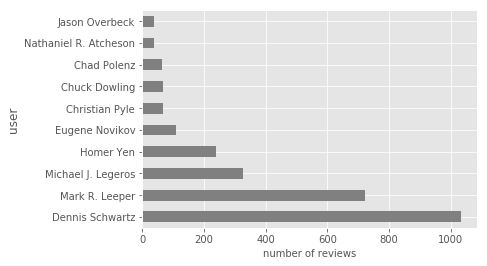

In [33]:
df4.plot(kind='barh', color='Grey')
plt.xlabel('number of reviews', fontsize=10)

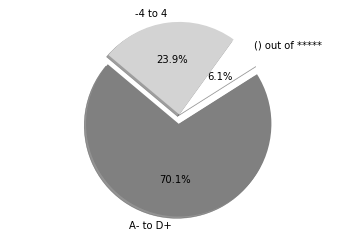

In [34]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'A- to D+', '() out of *****', '-4 to 4'
sizes = [2213, 191, 753]
colors = ['grey', 'white','lightgrey']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0xc475fd0>],
 'caps': [<matplotlib.lines.Line2D at 0xc4869e8>,
 'fliers': [<matplotlib.lines.Line2D at 0xc48cc18>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc48c400>],
 'whiskers': [<matplotlib.lines.Line2D at 0xc480978>,
  <matplotlib.lines.Line2D at 0xc480b70>]}

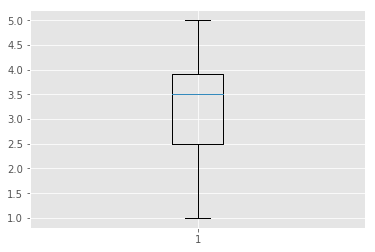

In [35]:
plt.boxplot(df["final rating"])

In [ ]:
df5 = df.loc[df['user'] == 'Dennis Schwartz'])